In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def generate_data(num_datapoints):
    '''
    Generates an array of simulated (x,y) datapoints, where 0 <= x <= 10, and the y is also between 0 and 10 and
    are generated as random noise along a random slope.  The total number of datapoints to generate is given by 
    the integer num_datapoints parameter.
    '''
    # Generate a number of random x-datapoints between 0 and 10
    x = np.random.uniform(0, 10, num_datapoints)
    
    # Create a random but somewhat correlated distribution for y-values
    slope = np.random.randint(10)/5
    noise = abs(5-x)
    y = slope * x + np.random.normal(0, noise, num_datapoints)
    
    # Remove any negative values
    y = [abs(i) for i in y]
    
    return x,y

In [3]:
def sum_of_squares(x,y,m):
    '''
    Calculates and returns the sum of squares from two equal length arrays that hold the x and y coordinates, 
    along with a single m value.
    '''
    return np.sum((y - (m * x))**2)

def d_sum_of_squares(x,y,m):
    '''
    Calculates and returns the derivative of the sum of squares equation based on indexed x and y arrays and an m value.
    '''
    return np.sum(2*x**2*m - 2*x*y)

def d2_sum_of_squares(x,y,m):
    '''
    Calculates and returns the second derivative of the sum of squares equation based on indexed x and y arrays and an m value.
    '''
    return np.sum(2*x**2)

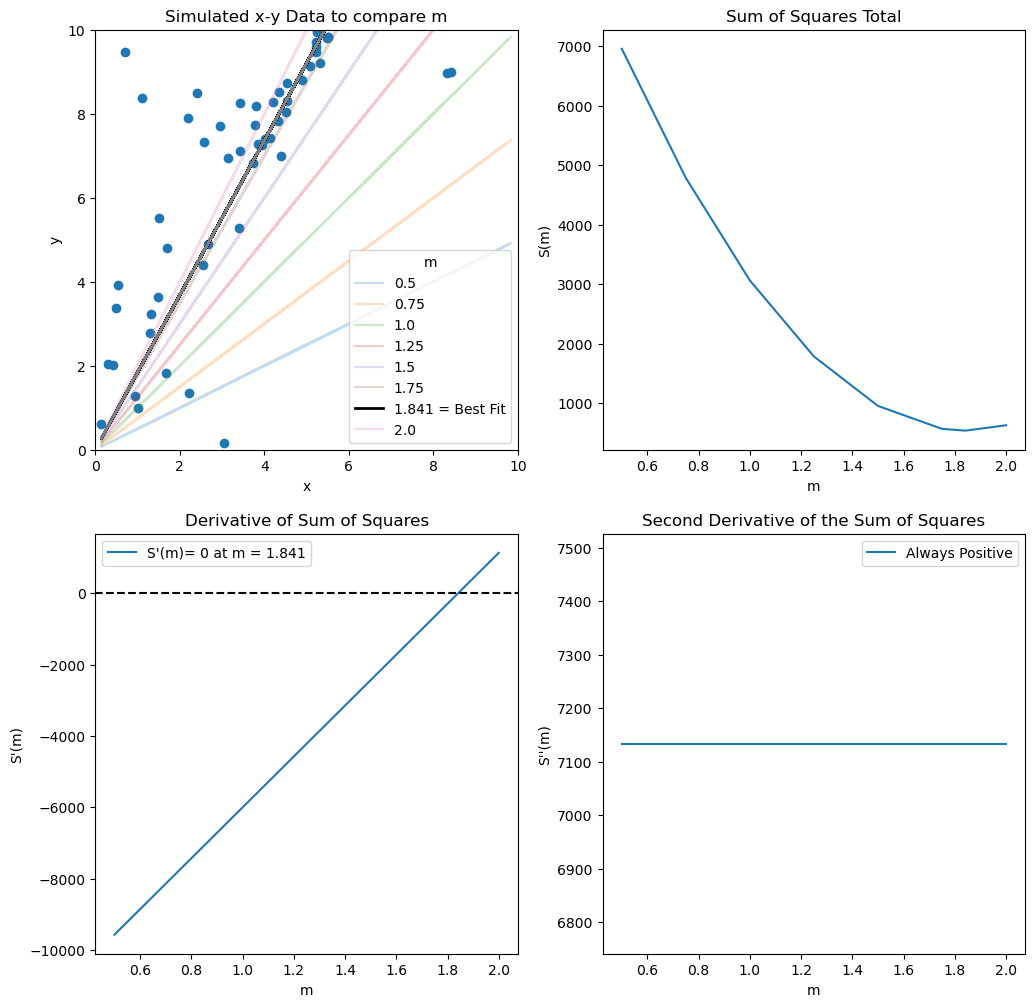

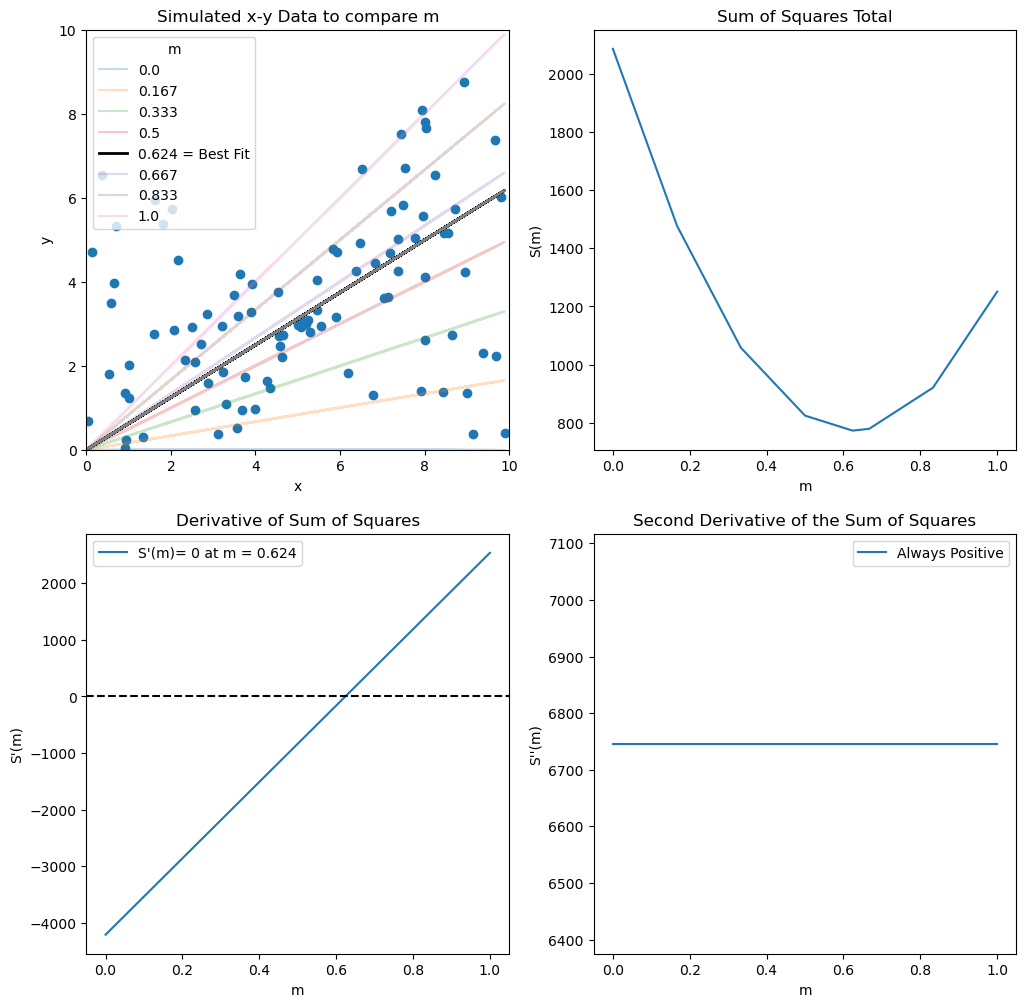

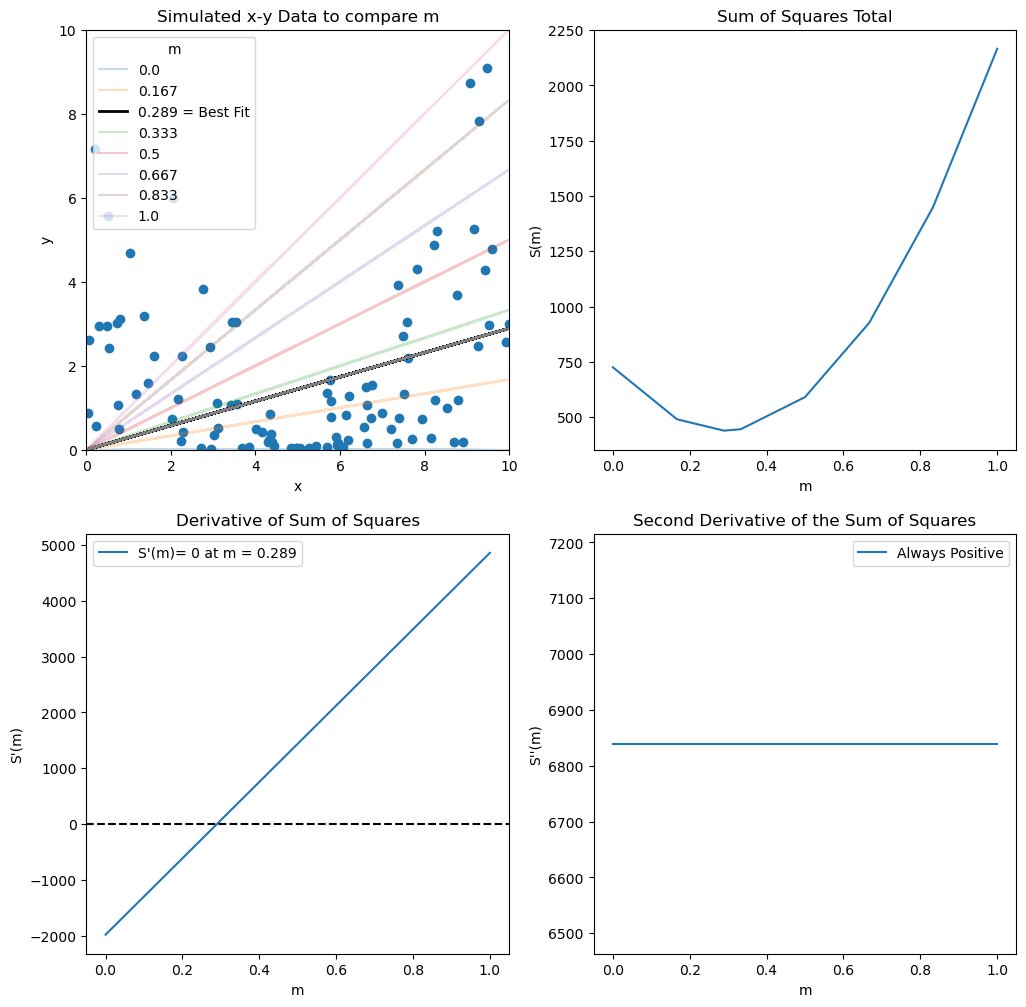

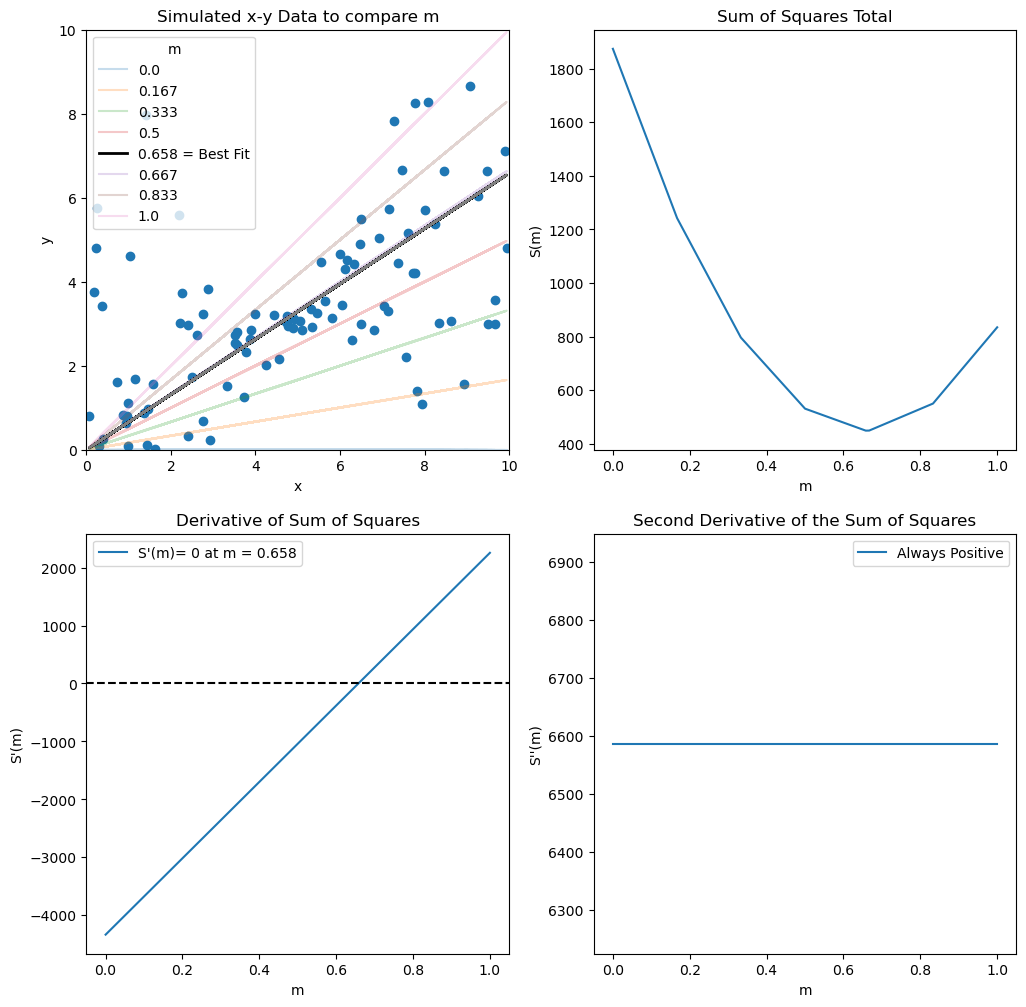

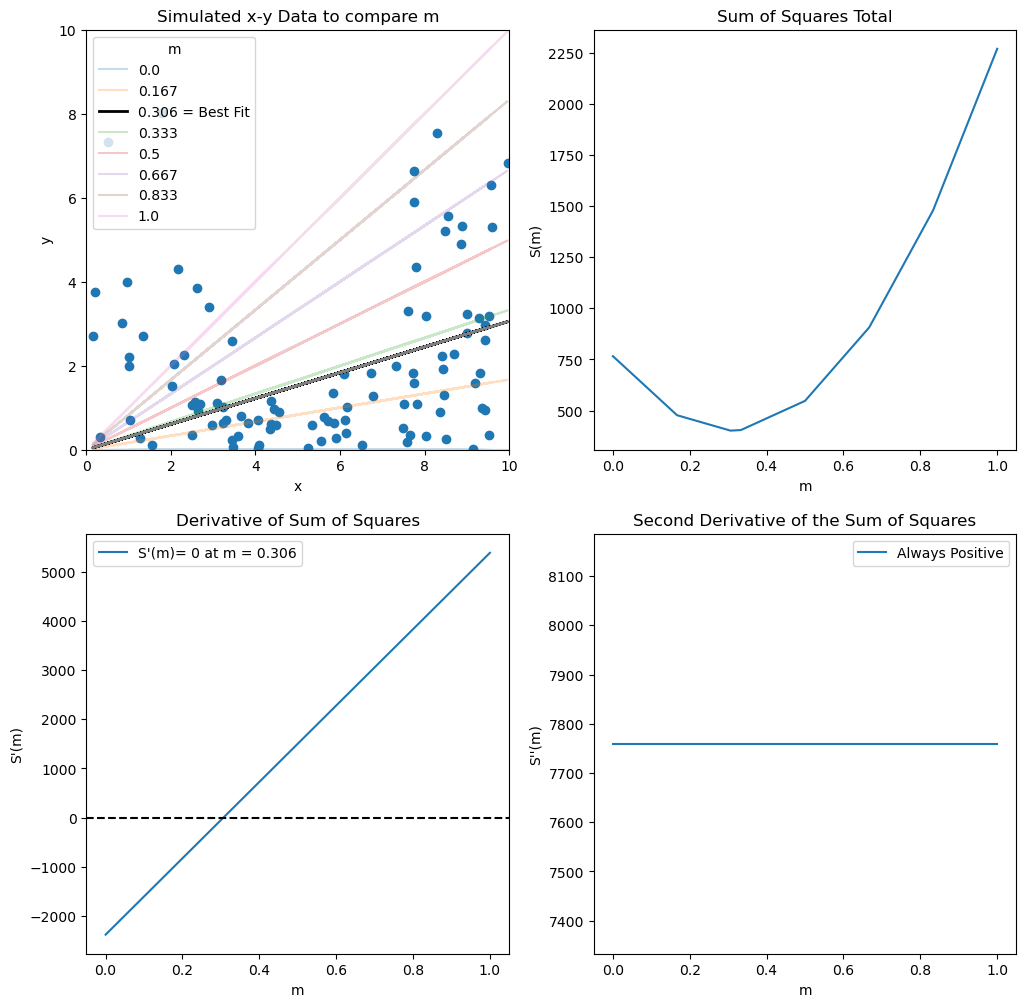

In [4]:
# The following script runs 5 sample graphs
for _ in range(5):
    # Generates a dataset
    x,y = generate_data(100)
    
    # Creates the figure for the plots
    plt.figure(figsize = (12,12))
    
    # Plots the dataset
    # Note - uses 4 subplots
    plt.subplot(221)
    plt.scatter(x,y)

    # This is the calcuated m that minimizes the sum of squares
    m_calc = np.sum(x*y)/np.sum(x**2)
    m_calc = round(m_calc,3)

    # Used to determine comparative m-values
    m_floor = m_calc // 1
    m = np.linspace(m_floor/2,m_floor+1,7)
    m = [round(i,3) for i in m]
    
    # Adds in the calculated best fit m
    m = np.append(m,m_calc)
    m = np.sort(m)

    # Create data structure to hold Sum of Squares values
    sos = []
    d_sos = []
    d2_sos = []
    
    # Generate multiple m values to compare against
    for i in m:
        if i == m_calc:
            plt.plot(x,i*x, linestyle = '-',linewidth=2, color='black', label=f'{m_calc} = Best Fit')
            sos.append(sum_of_squares(x,y,i))
            d_sos.append(d_sum_of_squares(x,y,i))
            d2_sos.append(d2_sum_of_squares(x,y,i))
        # Plot the line
        else:
            plt.plot(x,i*x, alpha=.25, label=i)
            sos.append(sum_of_squares(x,y,i))
            d_sos.append(d_sum_of_squares(x,y,i))
            d2_sos.append(d2_sum_of_squares(x,y,i))
    
    #print(f'Sample Plot {_ + 1}: Calculated m-value (slope) = {round(m_calc,3)}')

    # Generate calculated equation
    plt.plot(x,m_calc*x,)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Simulated x-y Data to compare m')
    plt.legend(title = 'm')
    
    plt.xlim(0,10)
    plt.ylim(0,10)
    
    plt.subplot(222)
    plt.xlabel('m')
    plt.ylabel('S(m)')
    plt.plot(m,sos)
    plt.title('Sum of Squares Total')
    
    plt.subplot(223)
    plt.xlabel('m')
    plt.ylabel('S\'(m)')
    plt.plot(m,d_sos, label = f'S\'(m)= 0 at m = {m_calc}')
    plt.axhline(0, ls='dashed',color='black')
    plt.title('Derivative of Sum of Squares')
    plt.legend()
    
    plt.subplot(224)
    plt.xlabel('m')
    plt.ylabel('S\'\'(m)')
    plt.plot(m,d2_sos,label='Always Positive')
    plt.title('Second Derivative of the Sum of Squares')
    plt.legend()

    plt.show()

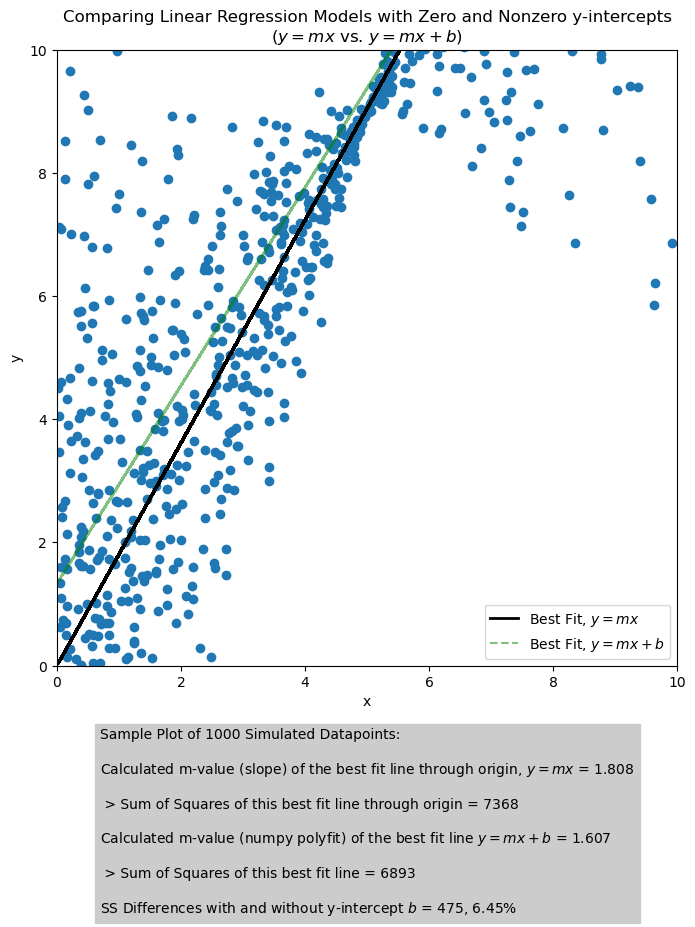

In [5]:
# Generates a dataset
x,y = generate_data(1000)

# Creates the Plot Object
plt.figure(figsize = (8,8))

# Plots the dataset
plt.scatter(x,y)

# This is the analytically calcuated m that minimizes the sum of squares for lines through origin
m = np.sum(x*y)/np.sum(x**2)

# Generate calculated equation
plt.plot(x,m*x,linestyle = '-',linewidth=2, color='black',label='Best Fit, $y=mx$')

# Calculates the total sum of squares based on that m
s_s = np.sum((y - (m * x)) ** 2)

# Best fit line with c!
m_c, c = np.polyfit(x, y, 1)  # m is slope, c is y-intercept for the best fit line
plt.plot(x, m_c*x + c, linestyle = 'dashed',alpha = .5, color ='green',label='Best Fit, $y=mx+b$')  # 'r' specifies that the line color should be red
s_s_c = np.sum((y - (m_c * x + c)) ** 2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparing Linear Regression Models with Zero and Nonzero y-intercepts\n($y = mx$ vs. $y = mx + b$)')

plt.xlim(0,10)
plt.ylim(0,10)

plt.text(.7,-4,f'''Sample Plot of 1000 Simulated Datapoints:\n
Calculated m-value (slope) of the best fit line through origin, $y=mx$ = {round(m,3)}\n
 > Sum of Squares of this best fit line through origin = {round(s_s)}\n
Calculated m-value (numpy polyfit) of the best fit line $y=mx+b$ = {round(m_c,3)}\n
 > Sum of Squares of this best fit line = {round(s_s_c)}\n
SS Differences with and without y-intercept $b$ = {round(abs(s_s - s_s_c))}, {round(abs((s_s - s_s_c)/s_s)*100,2)}%''',
        backgroundcolor='0.8')
plt.legend()

plt.show()